In [34]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
import pandas as pd
import os

## Plots settings

In [40]:
matplotlib.rcParams.update({'font.size': 16})
try:
    plt.style.use(['science', 'grid'])
except:
    print('Use standard settings')

## Load data

In [65]:
files = os.listdir('./input_data/')
dataset_filenames = sorted([file for file in files if 'results' in file])
plot_names = ['Full dataset', '10 km dataset', '7 km dataset', '4 km dataset']
plot_lines = [':', 'r--', '-', '-.']

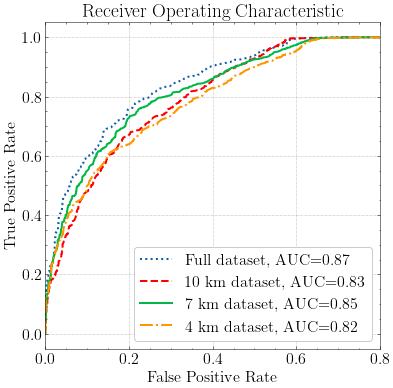

In [68]:
plt.figure(figsize=(6,6))
for index, filename in enumerate(dataset_filenames):
    df = pd.read_csv(os.path.join('input_data',filename), index_col=0)
    df.columns = ['proba', 'labels']
    fpr, tpr, _ = metrics.roc_curve(df['labels'],  df['proba'])
    auc = metrics.roc_auc_score(df['labels'],  df['proba'])
    plt.plot(fpr,tpr,plot_lines[index], linewidth=2, label=f"{plot_names[index]}, AUC={auc:.2f}",)
    plt.legend(loc=4)
    plt.grid()
plt.title('Receiver Operating Characteristic')
plt.xlim([0, 0.8])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('./plots/ROC_AUC.png', dpi=300)
plt.savefig('./plots/ROC_AUC.svg')
plt.show()